In [3]:
from google.colab import files
upload = files.upload()

Saving Suicide_Detection.csv to Suicide_Detection.csv


In [35]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import re
from nltk.stem import WordNetLemmatizer
import warnings

In [36]:
df = pd.read_csv('Suicide_Detection.csv')

In [37]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [38]:
df.describe()

,Unnamed: 0
count,232074.000000
mean,174152.863518
std,100500.425362
min,2.000000
25%,87049.250000
50%,174358.500000
75%,261285.750000
max,348110.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [40]:
df.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [41]:
df.size

696222

In [42]:
df.shape

(232074, 3)

In [43]:
df.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

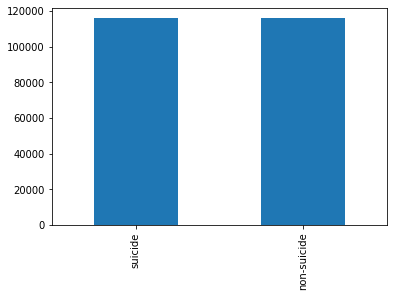

In [44]:
df['class'].value_counts().plot(kind = 'bar')

In [47]:
df = df.drop('Unnamed: 0',axis=1)
df

KeyError: ignored

In [49]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [50]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [51]:
email_regex = r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
regexes_to_remove = [email_regex, r'Subject:', r'Re:']
warnings.filterwarnings('ignore')

In [54]:
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', str(df['text'][i]))
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    review = ' '.join(review)

    for r in regexes_to_remove:
        df['text'][i] = re.sub(r, '', review)

In [55]:
df

,text,class
0,ex wife threatening suiciderecently left wife ...,suicide
1,weird get affected compliment coming someone k...,non-suicide
2,finally almost never hear bad year ever swear ...,non-suicide
3,need helpjust help im cry hard,suicide
4,losthello name adam struggling year afraid pas...,suicide
...,...,...
232069,like rock going get anything go http musictast...,non-suicide
232070,tell many friend lonely everything deprived pr...,non-suicide
232071,pee probably taste like salty tea someone dran...,non-suicide
232072,usual stuff find herei posting sympathy pity k...,suicide
